In [1]:
from IPython.display import display

import pandas as pd
import numpy as np

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

from utils import load_dataset, clean_dataset
from bias_utils import aequitas_preprocessing, df_to_aequitas, fairness_report

import matplotlib.pyplot as plt

## Steps to do before using fairness_report

In [2]:
#df = load_dataset()
#df = clean_dataset(df) # select only searched entries, location preprocessed
#df = aequitas_preprocessing(df) # preprocess age to categorical
#protected_classes = ['SubjectAge','SubjectRaceCode','SubjectSexCode','Is State Resident?', 'Is Town Resident?']
#df_aequitas = df_to_aequitas(df, protected_classes)
#report,text = fairness_report(df_aequitas, text_report=True)

# Example of aequitas

In [3]:
df = load_dataset()
df = clean_dataset(df) # select only searched entries, location preprocessed
df = aequitas_preprocessing(df) # preprocess age to categorical

In [4]:
display(df.head(2))
display(df.shape)

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,Is State Resident?,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,Is Town Resident?
71,True,False,Bridgeport,2013-10-01 00:46:00,bridgeport,V,1207,Yes,I,Speed Related,21-45,H,White,Male,Yes
143,True,True,Milford,2013-10-01 01:50:00,milford,E,2325,Yes,I,Defective Lights,21-45,N,White,Male,Yes


(76743, 15)

In [7]:
protected_classes = ['SubjectAge','SubjectRaceCode','SubjectSexCode','Is State Resident?', 'Is Town Resident?']
df_aequitas = df_to_aequitas(df, model_prediction='VehicleSearchedIndicator',protected_classes=protected_classes)

In [10]:
report,text = fairness_report(df_aequitas, text_report=True)
print(text)

model_id, score_thresholds 1 {'rank_abs': [76743]}
get_disparity_predefined_group()

Fairness Report
----------
SubjectAge : 21-45
It is 1.3 times more likely to fail in people who are 21-45 than people who are <21.

SubjectAge : >45
It is 1.52 times more likely to fail in people who are >45 than people who are <21.




In [5]:
g = Group()
aqp = Plot()
b = Bias()

xtab, _ = g.get_crosstabs(df_aequitas)

model_id, score_thresholds 1 {'rank_abs': [76743]}


Text(0.5, 1.0, 'Error rate (%) (1 - success rate)')

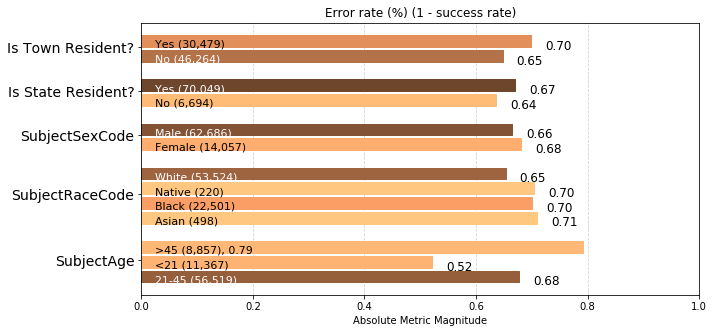

In [6]:
precision = aqp.plot_group_metric(xtab, 'fdr')
plt.title('Error rate (%) (1 - success rate)')

### Bias

In [8]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df_aequitas, 
                                        ref_groups_dict={'SubjectRaceCode':'White', 'SubjectSexCode':'Male', 'SubjectAge':'<21', 'Is Town Resident?':'No','Is State Resident?':'No'}, 
                                        alpha=0.05)

get_disparity_predefined_group()


In [27]:
bdf['fdr_ref_group_value']

0       <21
1       <21
2       <21
3     White
4     White
5     White
6     White
7      Male
8      Male
9        No
10       No
11       No
12       No
Name: fdr_ref_group_value, dtype: object